In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with pd.HDFStore('train.h5') as train:
    df = train.get('train')

In [3]:
print('Shape : {}'.format(df.shape))

Shape : (1710756, 111)


In [4]:
null_counts = df.isnull().sum()

<Container object of 111 artists>

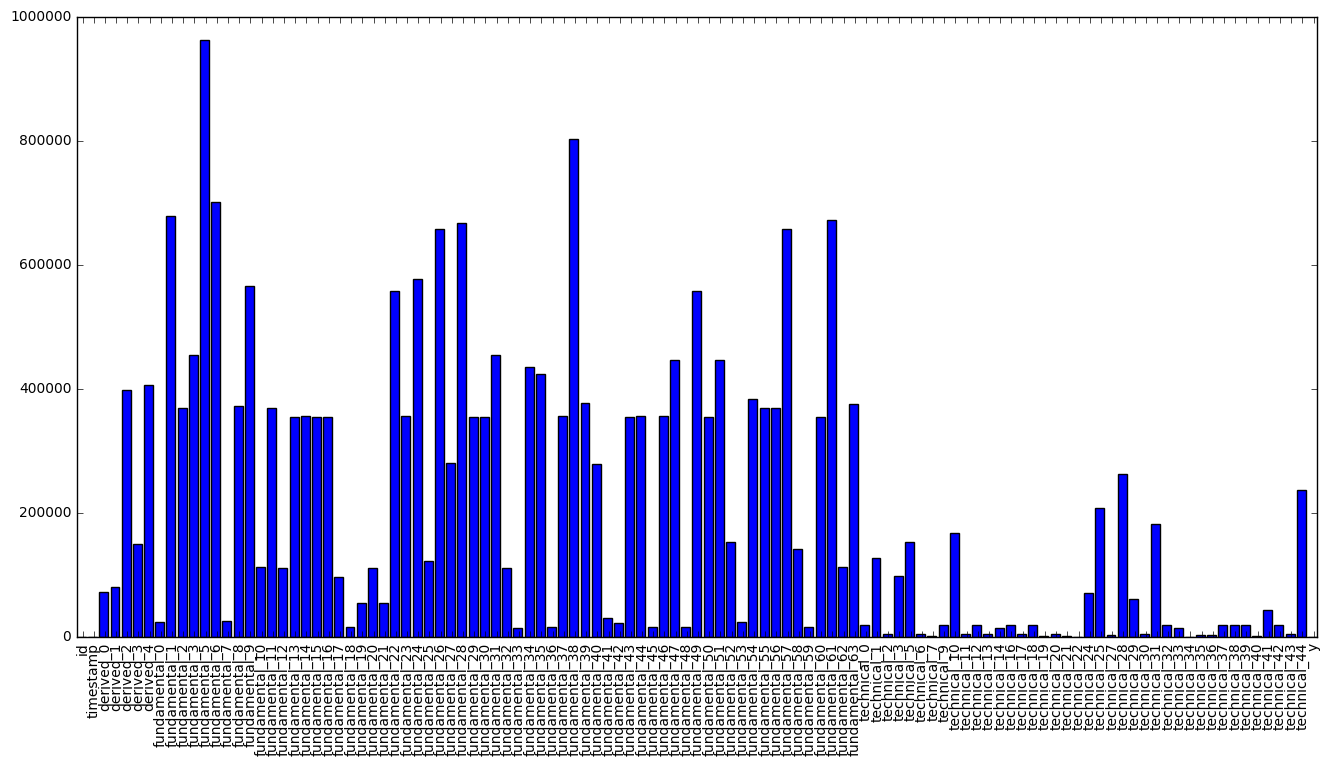

In [5]:
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.bar(np.arange(len(null_counts)),null_counts)

In [6]:
feature_columns = df.columns.drop(['id','timestamp','y'])
iterables = [feature_columns,['count','fraction','seq']]
index = pd.MultiIndex.from_product(iterables,names=['feature','stat'])
ids = df.id.unique()
nan_df = pd.DataFrame(data=None,index=ids,columns=index)

In [7]:
from itertools import groupby
for name,group in df.groupby('id'):
    for c in feature_columns:
        nan_count = group[c].isnull().sum()
        timespan = len(group[c])
        nan_indices = pd.isnull(group[c]).nonzero()[0]
        nseq = len(list(groupby(enumerate(nan_indices),lambda (i,x):i-x)))
        nan_df.loc[name][c,'count'] = nan_count
        nan_df.loc[name][c,'fraction'] = nan_count * 1.0/timespan
        nan_df.loc[name][c,'seq'] = nseq

In [8]:
nan_df.head()

feature derived_0                derived_1                derived_2  \
stat        count   fraction seq     count   fraction seq     count   
10              0          0   0         0          0   0         0   
11              0          0   0         0          0   0         0   
12              0          0   0         0          0   0         0   
25             87  0.0479868   1        53  0.0292333   1         1   
26              0          0   0         0          0   0         0   

feature                  derived_3 ... technical_41 technical_42            \
stat        fraction seq     count ...          seq        count  fraction   
10                 0   0         0 ...            1           21  0.181034   
11                 0   0         0 ...            1           21  0.011583   
12                 0   0         0 ...            1           21  0.011583   
25       0.000551572   1        71 ...            1           21  0.011583   
26                 0   0         0 ...            1           21  0.011583   

feature     technical_43              technical_44                 
stat    seq        count fraction seq        count   fraction seq  
10        1            0        0   0          116          1   1  
11        1            0        0   0          165  0.0910094   1  
12        1            0        0   0          165  0.0910094   1  
25        1            0        0   0          165  0.0910094   1  
26        1            0        0   0          165  0.0910094   1  

[5 rows x 324 columns]

In [24]:
seq_df = nan_df.xs('seq',level='stat',axis=1).head()

In [35]:
seq_df.max().unique()

array([ 1.,  0.])